# Pymaceuticals Inc.
---
As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### Analysis
- Pie chart shows that male mice tested comprised (51%) and female is (49%) (distribution of female versus male).
- There are 1893 observations for 249 mice.
- The correlation between mouse weight and the average tumor volume is 0.84, so there's a strong positive correlation between mouse weight & average tumor volume. As weight increase, average tumor volume increase.
- Based Mean Tumor Volume data, the tumor size was lower for Capomulin and Ramicane in comparison with the other drugs regimens given.
- Looking at the line plot of tumor volume vs. time point for a mouse treated with Capomulin, the tumor volume started to decrease 20 days after treatment, & continue shrinking for 40 days.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import math

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudyData = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
mouseStudyData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouseStudyData["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = mouseStudyData[mouseStudyData.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicateMice = duplicateMice['Mouse ID'].unique()
duplicateMice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = mouseStudyData.loc[mouseStudyData['Mouse ID'] == 'g989']
duplicateMiceData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Use isin() method to check if the df contains the value, set it to False to exclude the specified value
cleanDf = mouseStudyData[mouseStudyData['Mouse ID'].isin(['g989']) == False]
cleanDf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# .nunique() returns the number of unique values
cleanDf['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumorVol_mean     = cleanDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumorVol_median   = cleanDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorVol_variance = cleanDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorVol_stdDev   = cleanDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorVol_sem      = cleanDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
                                          
df1  = pd.merge( tumorVol_mean, tumorVol_median, how= "left", on = ['Drug Regimen'])
df1 = df1.rename(columns= {"Tumor Volume (mm3)_x": "Mean Tumor Volume" ,
                           "Tumor Volume (mm3)_y": "Median Tumor Volume" })
                       
df2 = pd.merge(df1, tumorVol_variance , how="left", on = ['Drug Regimen'])
df2= df2.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
                        
df3 = pd.merge( df2, tumorVol_stdDev , how="left", on = ['Drug Regimen'])
df3 = df3.rename(columns= {"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}) 
                         
df4 = pd.merge( df3, tumorVol_sem, how="left", on = ['Drug Regimen'])
df4 = df4.rename(columns= {"Tumor Volume (mm3)":"Tumor Volume Std. Err." })
df4


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

sumstat_df = cleanDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

#  "product function (from_product) can be used to create Multiindex"
sumstat_df.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], sumstat_df.columns])
sumstat_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

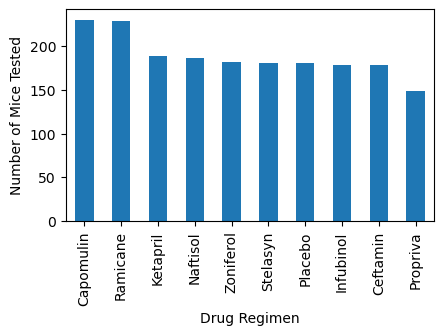

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#"figsize attribute allows us to specify the width and height of a figure in-unit inches.""
regimen_timepoints = cleanDf['Drug Regimen'].value_counts()
#regimen_timepoints kind = "bar",
barplot = regimen_timepoints.plot.bar(figsize = (4.75,2.75), xlabel= "Drug Regimen", ylabel = "Number of Mice Tested"  )



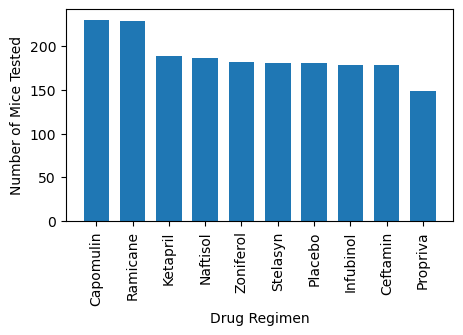

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(5,2.75)) 
plt.bar(regimen_timepoints.index, regimen_timepoints.values, width = 0.7)
plt.xlabel("Drug Regimen")
plt.ylabel('Number of Mice Tested')

plt.xticks(rotation=90)
plt.show()

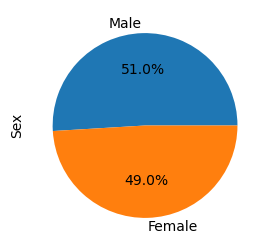

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution = cleanDf['Sex'].value_counts()

pieplot = distribution.plot.pie(autopct="%1.1f%%", figsize=(3,3))
   


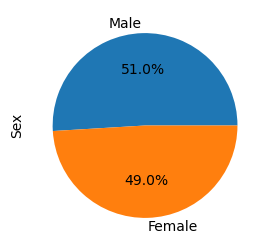

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(3,3))

plt.pie(distribution.values, labels = distribution.index, autopct='%1.1f%%')
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint = mouseStudyData.groupby(['Mouse ID'])['Timepoint'].max()
lastTimepoint = lastTimepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastTimepointMerge = lastTimepoint.merge(mouseStudyData, on=['Mouse ID','Timepoint'], how= "left")
lastTimepointMerge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolTot = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = lastTimepointMerge.loc[lastTimepointMerge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
   
    # add subset 
    tumorVolTot.append(tumorVol)
    
    # Determine outliers using upper and lower bounds
    quartile = tumorVol.quantile([.25, .5, .75])
    lowerQuartile = quartile[.25]
    upperQuartile = quartile[.75]
    iqr = upperQuartile - lowerQuartile

    upperBound = upperQuartile + (iqr * 1.5)
    lowerBound = lowerQuartile - (iqr * 1.5)

    outlier = tumorVol.loc[(tumorVol > upperBound) | (tumorVol < lowerBound) ]
    print(f'{treatment}s potential outliers: {outlier}')
    

Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


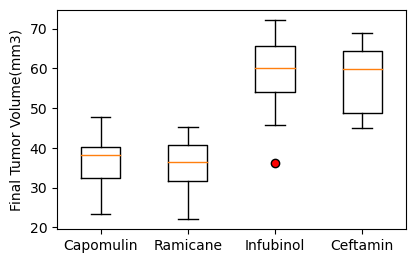

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor='red', marker='o')
fig = plt.figure(figsize =(4.5, 2.85))
plt.boxplot(tumorVolTot, labels= treatments, flierprops=red_circle )
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()






## Line and Scatter Plots

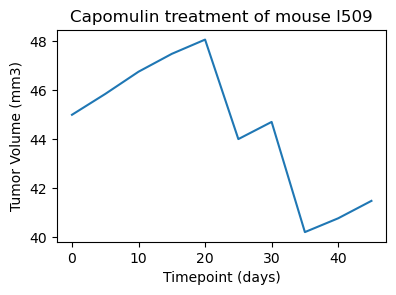

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulinTreated = mouseStudyData.loc[mouseStudyData["Drug Regimen"] == 'Capomulin',:]
treat_l509 = capomulinTreated[capomulinTreated["Mouse ID"] == 'l509']
plt.figure(figsize=(4.25, 2.75))
plt.plot(treat_l509["Timepoint"], treat_l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()


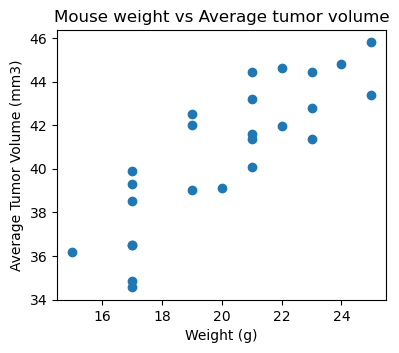

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

averageRegimen = capomulinTreated.groupby(["Mouse ID"]).mean(numeric_only=True)

plt.figure(figsize=(4.25, 3.5))
plt.scatter(averageRegimen['Weight (g)'], averageRegimen['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs Average tumor volume')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


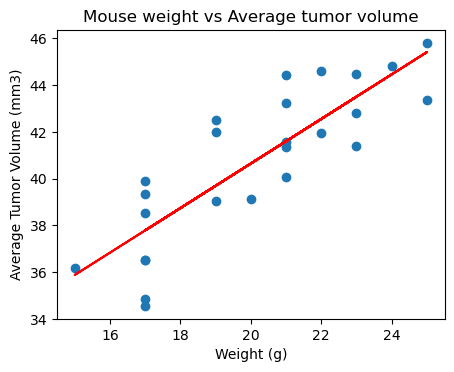

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(averageRegimen['Weight (g)'], averageRegimen['Tumor Volume (mm3)'])[0]

print("The correlation between mouse weight and the average tumor volume is {:.2f}".format(correlation))
#print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}.")


x = averageRegimen['Weight (g)']
y = averageRegimen['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regressionValues = x * slope + intercept

#Create the plot
plt.figure(figsize=(5, 3.75))
plt.scatter( x, y)
plt.plot( x, regressionValues, "r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Mouse weight vs Average tumor volume")
plt.show()


